#Kaggle conection

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fincher17","key":"66ed96c2db9ae3c74ae3bff7bd919804"}'}

In [3]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

#Exercise 1 : Understanding Data Visualization

- Explain why data visualization is important in data analysis.
- Describe the purpose of a line graph in data visualization.

#Exercise 2 : Creating A Line Plot For Temperature Variation

- Create a simple line plot using Matplotlib that represents the temperature variations over a week.
- Use a list of temperature values for each day of the week (e.g., [72, 74, 76, 80, 82, 78, 75]) and label the x-axis as “Day” and the y-axis as “Temperature (°F)”.

Text(0.5, 1.0, 'Forecast')

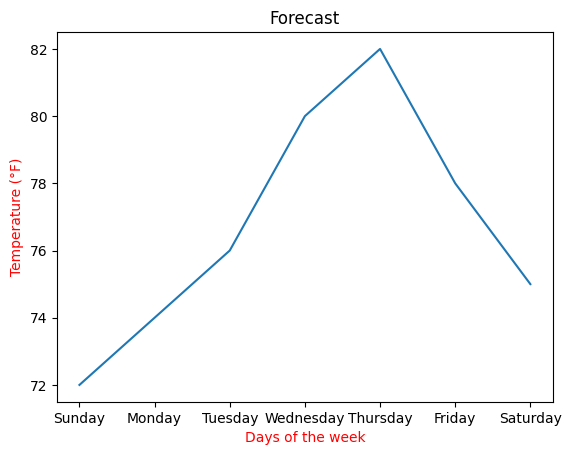

In [17]:
import matplotlib.pyplot as plt

temp = [72, 74, 76, 80, 82, 78, 75]
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.plot(days, temp)
plt.ylabel('Temperature (°F)', c='r')
plt.xlabel('Days of the week', c='r')
plt.title('Forecast')

#Exercise 3 : Visualizing Monthly Sales With A Bar Chart

- Generate a bar chart using Matplotlib to visualize the monthly sales data for a retail store.
- Create a list of sales values for each month (e.g., [5000, 5500, 6200, 7000, 7500]) and label the x-axis as “Month” and the y-axis as “Sales Amount ($)”.

Text(0.5, 1.0, 'Sales')

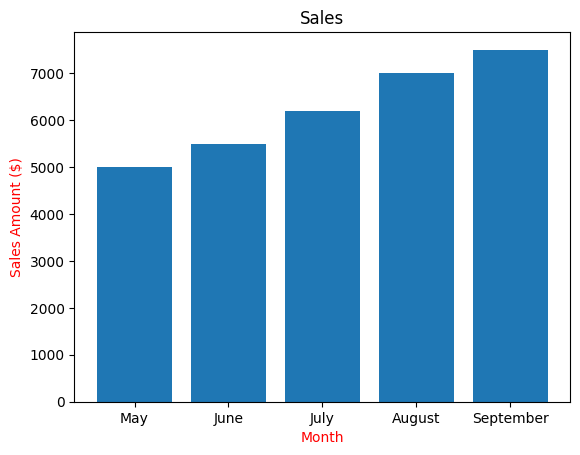

In [32]:
sales = [5000, 5500, 6200, 7000, 7500]
month = ['May', 'June', 'July', 'August', 'September']
plt.bar(month, sales)
plt.xlabel('Month', c='r')
plt.ylabel('Sales Amount ($)', c='r')
plt.title('Sales')

#Exercise 4 : Data Visualisation

- Calculate the total quantity of products sold by the company.
- Identify the category that had the highest revenue and calculate how much revenue it generated.
- Determine the average revenue per sale in the dataset.
- Create a bar chart to visualize the total revenue generated in each quarter of the year (Q1, Q2, Q3, Q4).

In [63]:
import pandas as pd
data = pd.read_csv('/content/sample_data/sales_data.csv')

###Data exploration

In [76]:
data.head(5)

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [65]:
data['category'].drop_duplicates()

0      Electronics
2         Clothing
5      Accessories
11            Bags
14           Shoes
214       Clohting
343           Bgas
359        Shoeses
Name: category, dtype: object

In [77]:
data[['revenue', 'category', 'date']].isnull().apply(sum)

revenue     0
category    0
date        0
dtype: int64

###Data cleaning

In [66]:
data.loc[data['category'] == 'Bgas', 'category'] = 'Bags'
data.loc[data['category'] == 'Shoeses', 'category'] = 'Shoes'
data.loc[data['category'] == 'Clohting', 'category'] = 'Clothing'

In [67]:
data['revenue'].fillna(data['revenue'].mean(), inplace=True)

###Data processing

In [68]:
display(f'Total revenue: {round(sum(data["revenue"]), 1)}$')

'Total revenue: 760390.7$'

In [69]:
data.groupby('category').sum('revenue')

,price,quantity,revenue
category,,,
Accessories,10680.0,962.0,106760.679348
Bags,1200.0,408.0,20400.000000
Clothing,6420.0,2281.0,95550.000000
Electronics,57300.0,1439.0,516080.000000
Shoes,1920.0,270.0,21600.000000


In [73]:
display(f'Average revenue per sale: {round(data["revenue"].mean(), 1)}$')

'Average revenue per sale: 2060.7$'

In [93]:
data['Quarter'] = data['date'].apply(pd.to_datetime).dt.quarter

,price,quantity,revenue
Quarter,,,
1,19910.0,1322.0,182100.000000
2,18770.0,1307.0,186030.679348
3,19420.0,1335.0,197680.000000
4,19420.0,1396.0,194580.000000


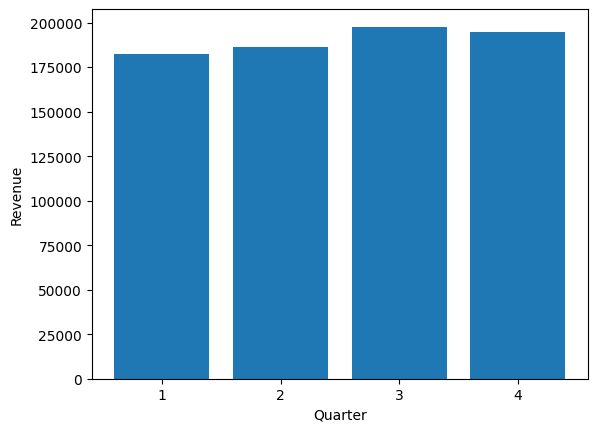

In [114]:
total_rev = data.groupby('Quarter').sum('revenue')
plt.bar(total_rev.index, total_rev['revenue'])
plt.xticks([1, 2, 3, 4])
plt.xlabel('Quarter')
plt.ylabel('Revenue')
total_rev

#Exercise 5 : Data Visualisation Using MatPlotLib

- Create a simple line plot using Matplotlib. Plot the function y = x^2 for x values ranging from -10 to 10. Add a title and label the x and y axes.
- Generate a bar chart to display the sales data of four different products (A, B, C, D) in a week. The sales values are 15, 30, 45, and 20 respectively. Label the chart appropriately.
- Create a pie chart representing the following data about favorite fruits of a group of people: Apples (40%), Bananas (30%), Cherries (20%), and Dates (10%). - Customize the chart with different colors for each fruit and add a legend.

Text(0.5, 1.0, 'Function y = x^2')

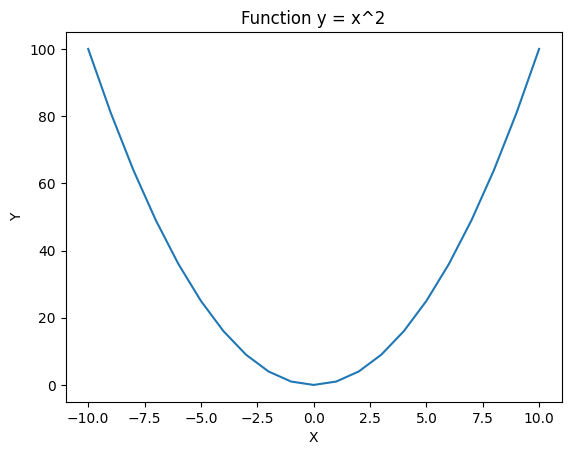

In [122]:
x = [x for x in range(-10, 11)]
y = [x[i]**2 for i in range(len(x))]
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function y = x^2')

Text(0.5, 1.0, 'Sales in a week')

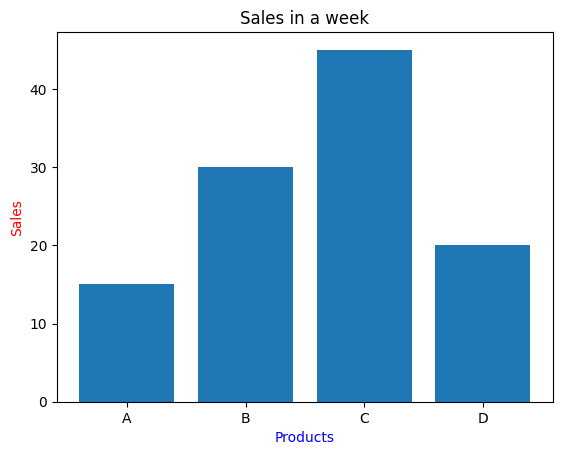

In [124]:
products = ['A', 'B', 'C', 'D']
sales = [15, 30, 45, 20]
plt.bar(products, sales)
plt.xlabel('Products', c='b')
plt.ylabel('Sales', c='r')
plt.title('Sales in a week')

Text(0.5, 1.0, 'Favorite fruits of a group of people')

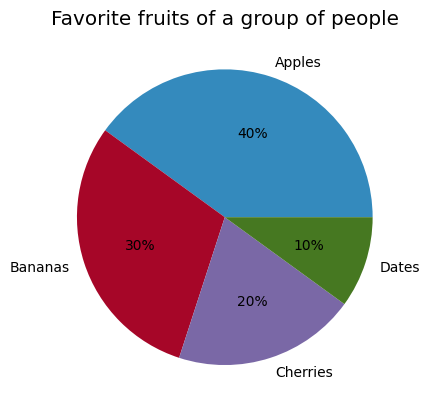

In [138]:
from matplotlib import style
style.use('bmh')
fruits = {'Apples': 40, 'Bananas': 30, 'Cherries': 20, 'Dates': 10}
plt.pie(fruits.values(), labels=fruits.keys(), autopct='%.f%%')
plt.title('Favorite fruits of a group of people')